In [96]:
import os
from pathlib import Path

import numpy as np
import skimage as sk
import cv2 as cv
from commonfunctions import *

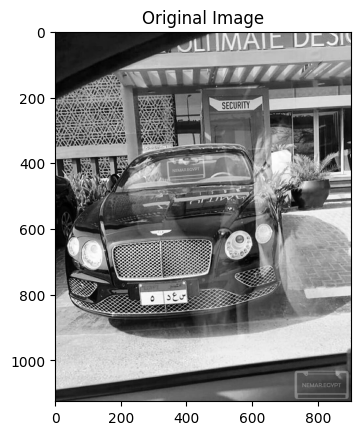

In [97]:
img = cv.imread("Dataset\\Vehicles\\2082.jpg", cv.IMREAD_GRAYSCALE)
show_images([img], ["Original Image"])

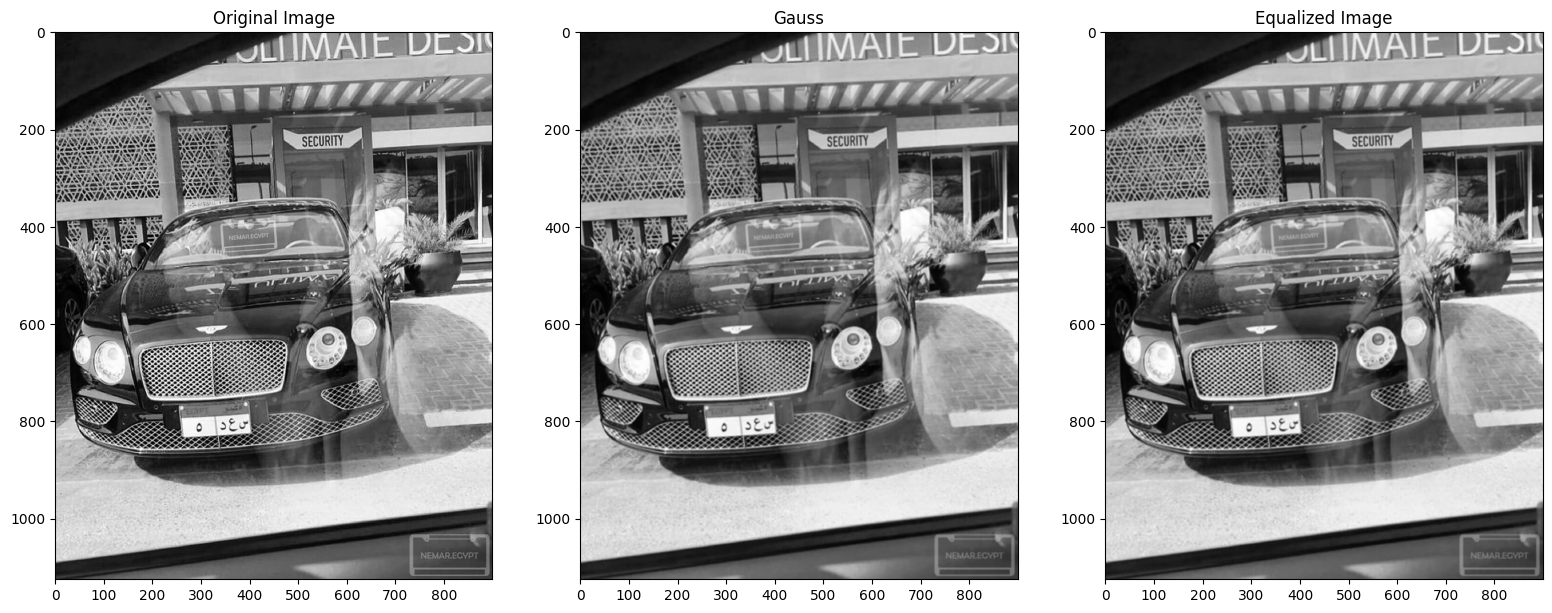

In [99]:
#noise removal using gaussian blur
img_gaussian = cv.GaussianBlur(img, (5, 5), 0)
# histogram equalization using open cv
img_eq = img_gaussian
show_images([img,img_gaussian, img_eq], ["Original Image","Gauss", "Equalized Image"])

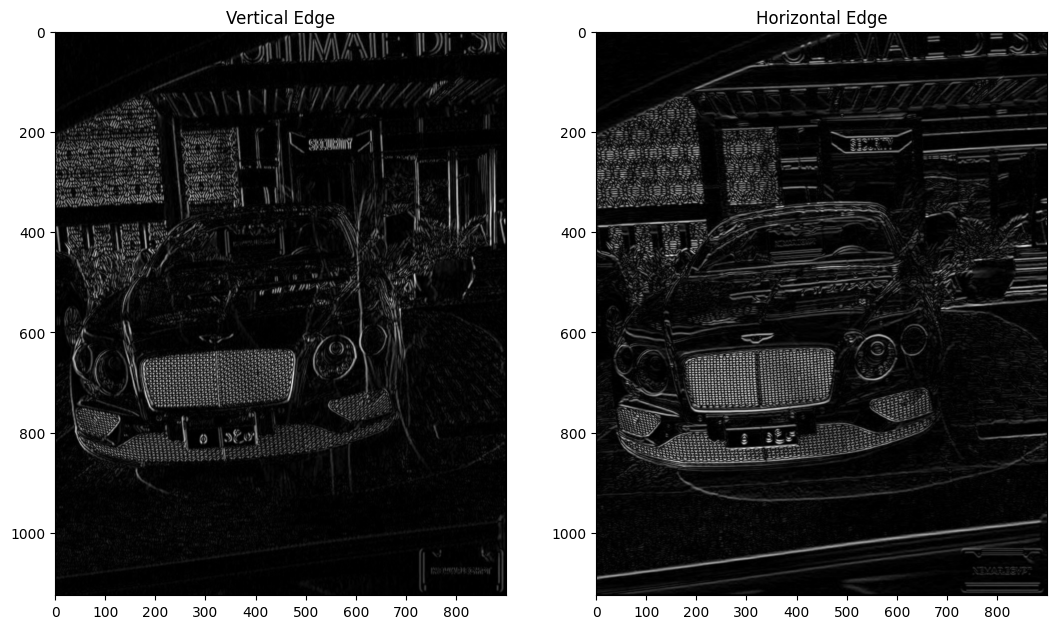

In [100]:
vertical_edge = cv.Sobel(img_eq, cv.CV_64F, 1, 0, ksize=5)
horizontal_edge = cv.Sobel(img_eq, cv.CV_64F, 0, 1, ksize=5)
vertical_edge = np.abs(vertical_edge)
horizontal_edge = np.abs(horizontal_edge)
vertical_edge = cv.normalize(vertical_edge, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
horizontal_edge = cv.normalize(horizontal_edge, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)

show_images([vertical_edge, horizontal_edge], ["Vertical Edge", "Horizontal Edge"])

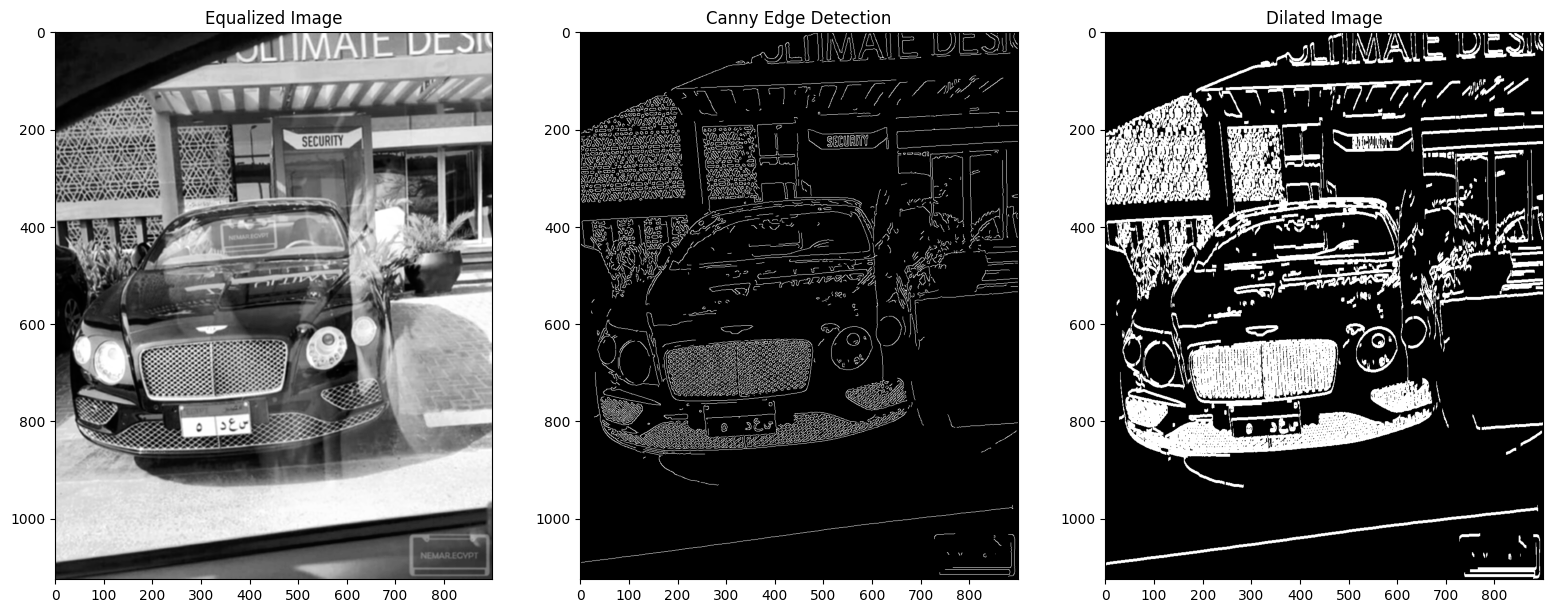

In [108]:
#noise removal using gaussian blur
img_gaussian = cv.GaussianBlur(img, (5, 5), 1.5)
# histogram equalization using open cv
bfilter = cv.bilateralFilter(img, 11, 17, 17)
edged = cv.Canny(bfilter, 30, 200)
img_dilated = cv.dilate(img_canny, (13, 5), iterations=5)
show_images([img_eq, img_canny, img_dilated], ["Equalized Image", "Canny Edge Detection", "Dilated Image"])
# show_images([img_eq, img_canny], ["Equalized Image", "Canny Edge Detection"])

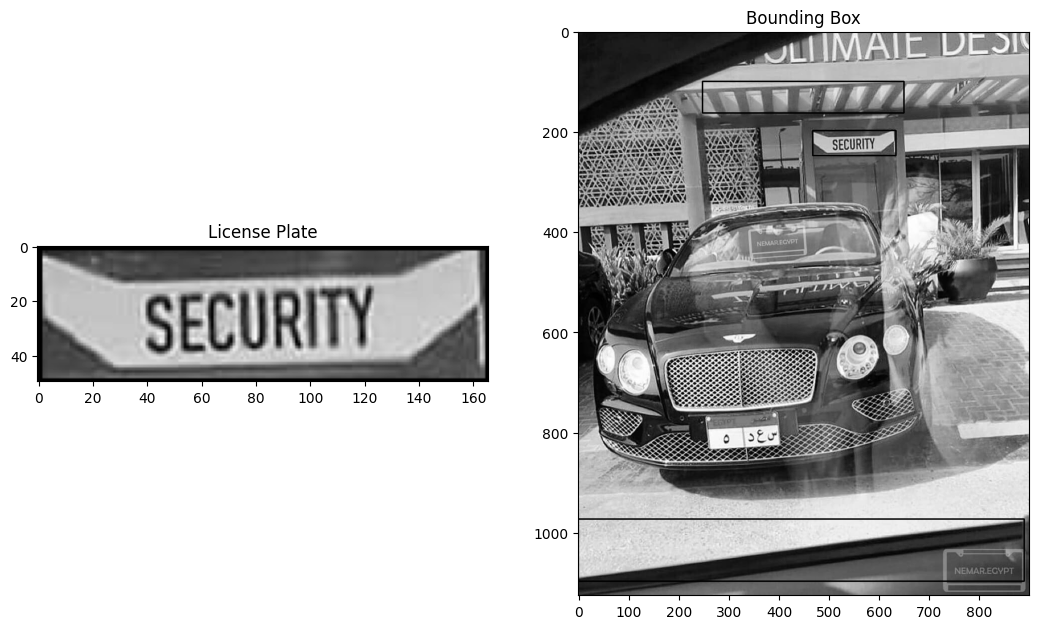

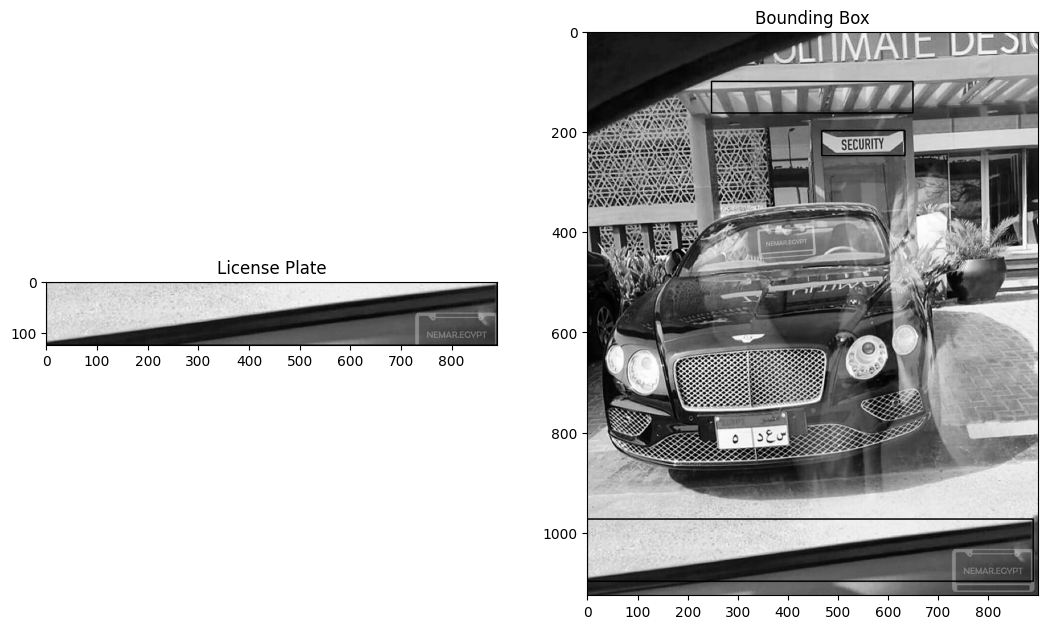

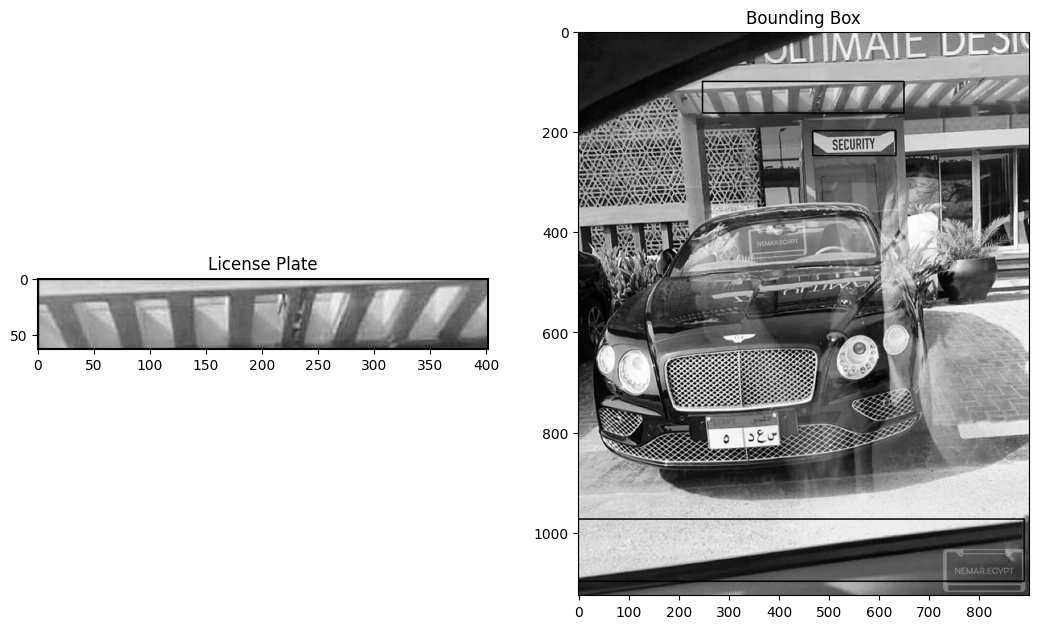

In [114]:
contours, _ = cv.findContours(img_dilated, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv.contourArea, reverse=True)[:10]
license_plate = None
bounding_box = None
for contour in contours:
    #min max
    x, y, w, h = cv.boundingRect(contour)
    aspect_ratio = w / h
    if aspect_ratio > 2:
        license_plate = img[y:y + h, x:x + w]
        bounding_box = cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        show_images([license_plate, bounding_box], ["License Plate", "Bounding Box"])


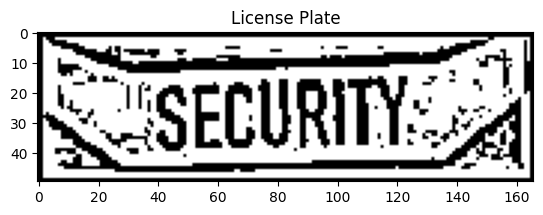

In [112]:
if license_plate is not None:
    license_plate = cv.adaptiveThreshold(license_plate, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
    show_images([license_plate], ["License Plate"])